<a href="https://colab.research.google.com/github/KShikha19/Notes_py1/blob/main/aerofit_case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement
To identify the characteristics of the target
audience for each type of treadmill offered by the company, to provide a better
recommendation of the treadmills to new customers

In [ ]:
#importing required libarires
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#importing data set
data = pd.read_csv('aerofit.csv')
data.head(3)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66


In [ ]:
#Total number of columns and rows
data.shape

(180, 9)

In [ ]:
#desciptive statstics
data.describe().round(2)

,Age,Education,Usage,Fitness,Income,Miles
count,180.00,180.00,180.00,180.00,180.00,180.00
mean,28.79,15.57,3.46,3.31,53719.58,103.19
std,6.94,1.62,1.08,0.96,16506.68,51.86
min,18.00,12.00,2.00,1.00,29562.00,21.00
25%,24.00,14.00,3.00,3.00,44058.75,66.00
50%,26.00,16.00,3.00,3.00,50596.50,94.00
75%,33.00,16.00,4.00,4.00,58668.00,114.75
max,50.00,21.00,7.00,5.00,104581.00,360.00


- Age ranges from 18 to 50 years, with mean 26 years.
- Education ranges from 12 to 21 years, with mean 16 years.
- Usage ranges from 2 to 7 days a week, with mean 3 days a week.
- Fitness ranges from 1 to 5, with mean 3.
- Income ranges from \$29562 to \$104581, with mean $50596.50.
- Number of miles a week run by customers range from 21 to 360 miles with mean of 103 miles.

In [ ]:
# analysing non numerical columns
data.describe(include='object')

,Product,Gender,MaritalStatus
count,180,180,180
unique,3,2,2
top,KP281,Male,Partnered
freq,80,104,107


- there are 3 unique product in this dataset , among 3 people mostly purchased KP281
- Male purchased most of treadmill
- Married people purchased most of treadmill

In [ ]:
# concise summary of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


- there are 180 rows and 9 columns
- all columns having non null values
- 6 columns are of integer datatype(namely Age, Education, Usage Fitness, Income, Miles) and 3 columns are of object datatype(Product, Gender , Maritial Status)

In [ ]:
data.isna().sum()

,0
Product,0
Age,0
Gender,0
Education,0
MaritalStatus,0
Usage,0
Fitness,0
Income,0
Miles,0


No null values is the dataset

In [ ]:
data['Product'].nunique()

3

3 uniques product

In [ ]:
data['Product'].unique()

array(['KP281', 'KP481', 'KP781'], dtype=object)

Name of the 3 unique products are 'KP281', 'KP481', 'KP781'

In [ ]:
data['Product'].describe()

,Product
count,180
unique,3
top,KP281
freq,80


In [ ]:
data['Product'].value_counts()

,count
Product,
KP281,80
KP481,60
KP781,40


KP281 is the most purchased product

In [ ]:
#percentage of KP281 bought
len(data[data['Product'] == 'KP281'])/len(data) * 100

44.44444444444444

44% people bought KP281

In [ ]:
#percentage of KP481 bought
len(data[data['Product'] == 'KP481'])/len(data) * 100

33.33333333333333

33% people bought KP481

In [ ]:
#percentage of K781 bought
len(data[data['Product'] == 'KP781'])/len(data) * 100

22.22222222222222

22% people bought KP781

Male are purchases most number of KP281

In [ ]:
# problity distribution of different types of product purchased by customer
prod_dist = data['Product'].value_counts(normalize=True)
prod_dist

,proportion
Product,
KP281,0.444444
KP481,0.333333
KP781,0.222222


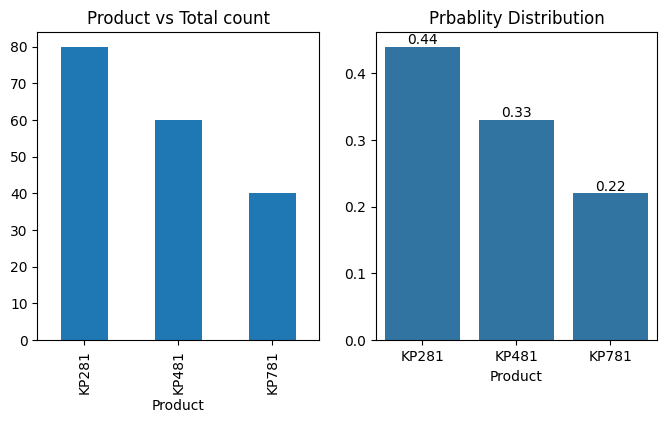

In [ ]:
prod_x = prod_dist.index
prod_y  = np.round( prod_dist.values,2)
prod_x, prod_y

#visualise
plt.figure(figsize=(8, 4))
plt.subplot(1,2,1)
data.groupby('Product').size().plot(kind='bar')
plt.title('Product vs Total count')
plt.subplot(1,2,2)

ax = sns.barplot(x = prod_x, y = prod_y)
for i in ax.containers:
  ax.bar_label(i,)
plt.title('Prbablity Distribution')

plt.show()

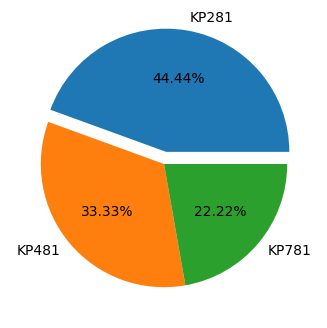

In [ ]:
# proportion of people purchased tredmill
labels = data['Product'].value_counts().index
x= data['Product'].value_counts().values
explode = [0.1,0,0]
plt.figure(figsize=(8, 4))
plt.pie(x , labels=labels,explode = explode, autopct='%1.2f%%')
plt.show()

In [ ]:
data['Age'].value_counts().sort_values(ascending=False)[:5]

,count
Age,
25,25
23,18
24,12
26,12
28,9


23-25 age group bough maximum number of tredmill

In [ ]:
# distribution of age column
data['Age'].describe()

,Age
count,180.000000
mean,28.788889
std,6.943498
min,18.000000
25%,24.000000
50%,26.000000
75%,33.000000
max,50.000000


<Axes: xlabel='Age', ylabel='Count'>

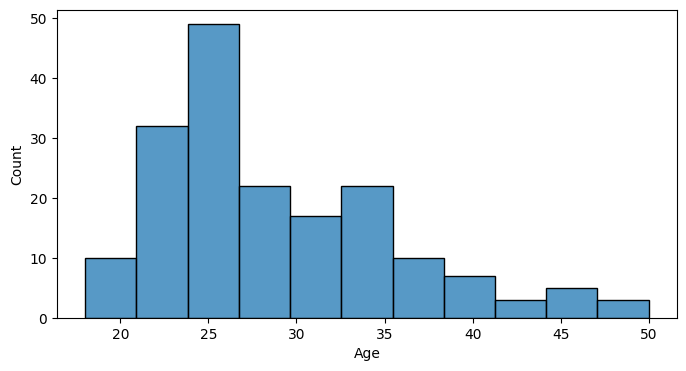

In [ ]:
plt.figure(figsize=(8, 4))
sns.histplot(data['Age'])

- most of the people buying tredmill is in age group of 24 to 33
- tredmill buying trend seems less in higher age group i.e above 40

In [ ]:
# 25th percentile or Q1
age_25 = np.percentile(data['Age'],25)
age_25

np.float64(24.0)

25% of the people purchsed who tredmill is less than 24 years old.

In [ ]:
# 50th percentile or median
age_50 = np.percentile(data['Age'],50)
age_50

np.float64(26.0)

50% of the people purchsed who tredmill is less than 26 years old.

In [ ]:
# 75th percentile or Q3
age_75 = np.percentile(data['Age'],75)
age_75

np.float64(33.0)

75% of the people purchsed who tredmill is less than 33 years old.

In [ ]:
#IQR
age_iqr = age_75-age_25
age_iqr

np.float64(9.0)

50% of the people who purchased a treadmill were between the ages of 24 and 33.

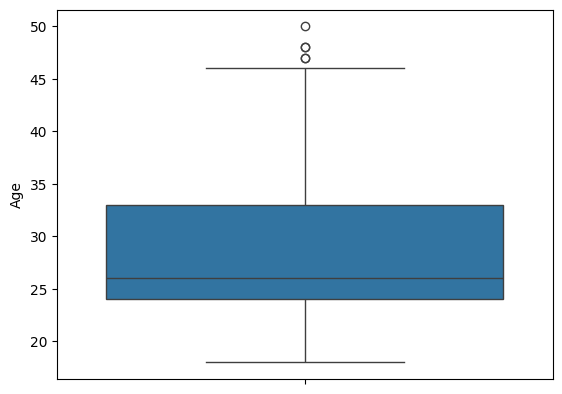

In [ ]:
sns.boxplot(y= data['Age'])
plt.show()

In [ ]:
upper_age = age_75 + 1.5*age_iqr
upper_age

np.float64(46.5)

In [ ]:
lower_age = age_25 - 1.5*age_iqr
lower_age

np.float64(10.5)

max age is 46.5 years and min is 10.5 years.

In [ ]:
len(data[data['Age']>upper_age])

5

there are 5 outliers in age column

In [ ]:
#percentage of outliers
len(data[data['Age']>upper_age])/len(data)

0.027777777777777776

- 2.7% of the values in dataset are outliers.
- In other words, we can say that 2.7% of treadmill purchases are made by customers aged over approximately 46.5 to 47 years.

In [ ]:
data['Gender'].describe()

,Gender
count,180
unique,2
top,Male
freq,104


- There are 2 unique values in the Gender column.
- Most treadmill purchases were made by males.

In [ ]:
data['Gender'].value_counts()

,count
Gender,
Male,104
Female,76


In [ ]:
data['Gender'].unique()

array(['Male', 'Female'], dtype=object)

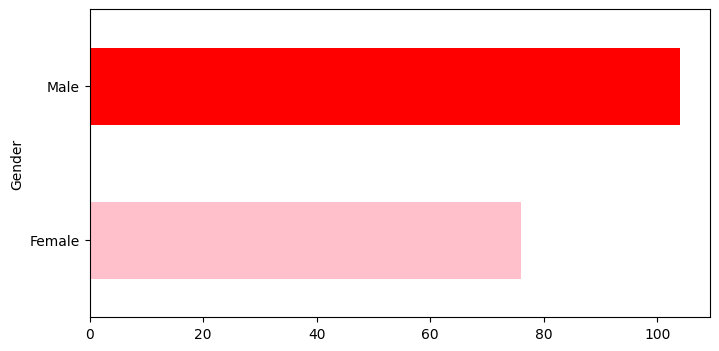

In [ ]:
plt.figure(figsize=(8, 4))
colors = ['pink', 'red']
data.groupby('Gender').size().plot(kind='barh', color = colors)
plt.show()

As compare to women most purchases were made by males

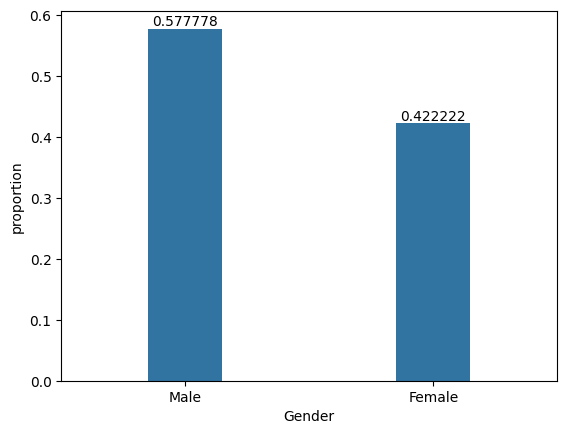

<Figure size 800x400 with 0 Axes>

In [ ]:
# probality distribution of Male and female purchasing tredmill

gen_prob = data['Gender'].value_counts(normalize  = True)
ax = sns.barplot(x = gen_prob.index, y = gen_prob, width = 0.3)
for i in ax.containers:
  ax.bar_label(i,)
plt.figure(figsize=(8, 4))
plt.show()

.57 chances are there that Male buys the product

In [ ]:
# percentage of Male
len(data[data['Gender']=='Male'])/len(data)

0.5777777777777777

57.78% of Male

In [ ]:
# percentage of Male
len(data[data['Gender']=='Female'])/len(data)

0.4222222222222222

42.23% of female

In [ ]:
data['Education'].describe()

,Education
count,180.000000
mean,15.572222
std,1.617055
min,12.000000
25%,14.000000
50%,16.000000
75%,16.000000
max,21.000000


In [ ]:
data['Education'].value_counts().sort_values(ascending=False)

,count
Education,
16,85
14,55
18,23
15,5
13,5
12,3
21,3
20,1


- people with education year of 16 purchased most number of tredmill (problably people doing bachelor degree's )

In [ ]:
#25 percentile
edu_25 = np.percentile(data['Education'], 25)
edu_25

np.float64(14.0)

In [ ]:
#50 percentile
edu_50 = np.percentile(data['Education'], 50)
edu_50

np.float64(16.0)

In [ ]:
#75 percentile
edu_75 = np.percentile(data['Education'], 75)
edu_75

np.float64(16.0)

In [ ]:
#IQR
edu_iqr = edu_75 - edu_25
edu_iqr

np.float64(2.0)

- 50% of people having education years between 14 and 16 bought most number of tredmills


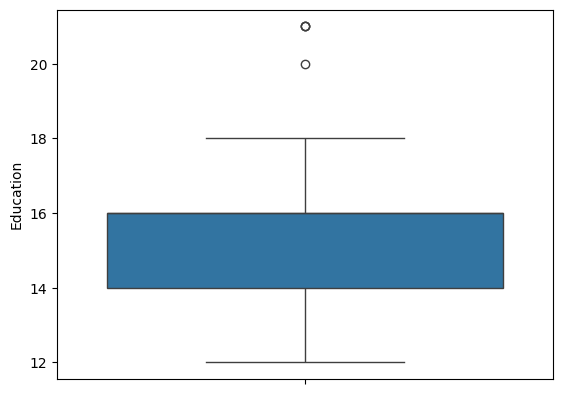

In [ ]:
#visualising education years distribution
sns.boxplot(data['Education'])
plt.show()

In [ ]:
upper_edu = edu_75 + 1.5*edu_iqr
upper_edu

np.float64(19.0)

In [ ]:
lower_edu = edu_25 + 1.5*edu_iqr
lower_edu

np.float64(17.0)

In [ ]:
#outliers in education years
len(data[data['Education']> 19])

4

In [ ]:
# percentage of outliers
len(data[data['Education']> 19])/len(data)

0.022222222222222223

2.7% of the purchases were made by customers with more than 19 years of education

In [ ]:
data['MaritalStatus'].describe()

,MaritalStatus
count,180
unique,2
top,Partnered
freq,107


In [ ]:
data['MaritalStatus'].unique()

array(['Single', 'Partnered'], dtype=object)

- 2 unique martial status i.e Single and Partnered
- Partnered made most of purchases

In [ ]:
data['MaritalStatus'].value_counts()

,count
MaritalStatus,
Partnered,107
Single,73


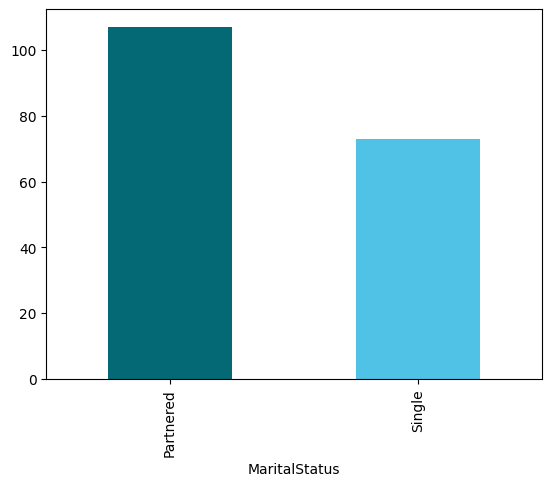

In [ ]:
data.groupby('MaritalStatus').size().plot(kind='bar', color = ['#056875', '#50C2E5']  )
plt.show()

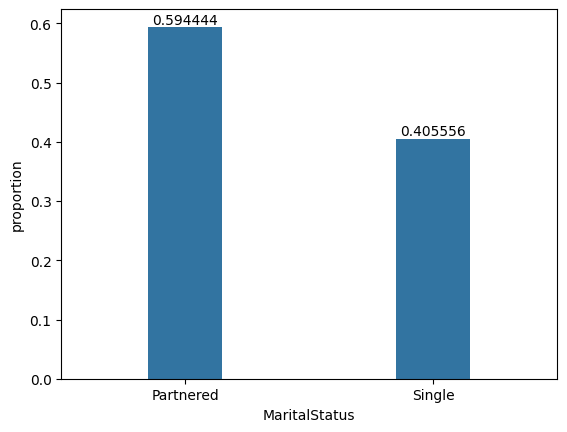

In [ ]:
mar_prob = data['MaritalStatus'].value_counts(normalize = True)
ax = sns.barplot(x = mar_prob.index, y = mar_prob, width = 0.3)
for  i in ax.containers:
  ax.bar_label(i)
plt.show()


Partnered buying maximum number of tredmills with 0.59% probablity

In [ ]:
# percentage of partnered
len(data[data['MaritalStatus']=='Partnered'])/len(data) * 100

59.44444444444444

In [ ]:
#percentage of Single
len(data[data['MaritalStatus']=='Single'])/len(data) * 100

40.55555555555556

- 59.45% people who made purchases are Partnered
- 40.56% are purchase made by people are Single

In [ ]:
#	Usage - The average number of times the customer plans to use the treadmill each week.
data['Usage'].describe()

,Usage
count,180.000000
mean,3.455556
std,1.084797
min,2.000000
25%,3.000000
50%,3.000000
75%,4.000000
max,7.000000


In [ ]:
data['Usage'].nunique()

6

In [ ]:
data['Usage'].unique()

array([3, 2, 4, 5, 6, 7])

In [ ]:
data['Usage'].value_counts()

,count
Usage,
3,69
4,52
2,33
5,17
6,7
7,2


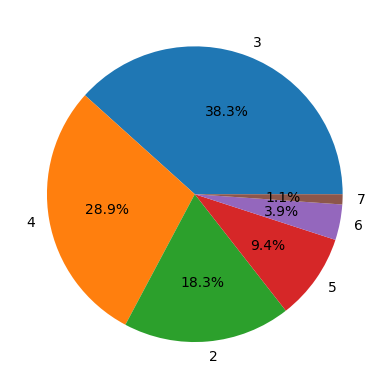

In [ ]:
use_labels = data['Usage'].value_counts().index
use_pr = data['Usage'].value_counts().values
plt.pie(labels=use_labels, x = use_pr, autopct = '%2.1f%%')
plt.show()

- most of people prefer to use tredmill 3 times a week
- very few prefer to use it for whole week

In [ ]:
# 25th percentile
use_25 = np.percentile(data['Usage'],25)
use_25

np.float64(3.0)

In [ ]:
# 50th percentile
use_50 = np.percentile(data['Usage'],50)
use_50

np.float64(3.0)

In [ ]:
# 75th percentile
use_75 = np.percentile(data['Usage'],75)
use_75

np.float64(4.0)

In [ ]:
use_iqr = use_75-use_25
use_iqr

np.float64(1.0)

- 50% of the people prefer to use tredmil on an averge of 3-4 times a week


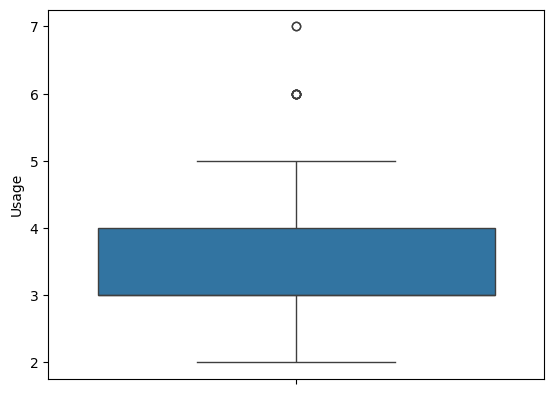

In [ ]:
sns.boxplot(y = data['Usage'])
plt.show()

In [ ]:
upper_use = use_75 + 1.5*use_iqr
upper_use

np.float64(5.5)

In [ ]:
lower_use = use_25 - 1.5*use_iqr
lower_use

np.float64(1.5)

In [ ]:
#outlier
data[data['Usage'] > upper_use]

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
154,KP781,25,Male,18,Partnered,6,4,70966,180
155,KP781,25,Male,18,Partnered,6,5,75946,240
162,KP781,28,Female,18,Partnered,6,5,92131,180
163,KP781,28,Male,18,Partnered,7,5,77191,180
164,KP781,28,Male,18,Single,6,5,88396,150
166,KP781,29,Male,14,Partnered,7,5,85906,300
167,KP781,30,Female,16,Partnered,6,5,90886,280
170,KP781,31,Male,16,Partnered,6,5,89641,260
175,KP781,40,Male,21,Single,6,5,83416,200


In [ ]:
#len of outlier
len(data[data['Usage'] > upper_use])

9

In [ ]:
#outliers
9/len(data)

0.05

5% of the customer expect to use tredmill for more than 5 times a week

In [ ]:
#Fitness - Self-rated fitness on a 1-to-5 scale, where 1 is the poor shape and 5 is the excellent shape
data['Fitness'].describe()

,Fitness
count,180.000000
mean,3.311111
std,0.958869
min,1.000000
25%,3.000000
50%,3.000000
75%,4.000000
max,5.000000


In [ ]:
data['Fitness'].nunique()

5

In [ ]:
data['Fitness'].value_counts()

,count
Fitness,
3,97
5,31
2,26
4,24
1,2


- maximum people self rated themselve as 3 on scale from 1to 5

In [ ]:
#percentage of people with scale 3
len(data[data['Fitness'] == 3])/len(data)*100

53.888888888888886

In [ ]:
#percentage of people with scale 5
len(data[data['Fitness'] == 5])/len(data)*100

17.22222222222222

In [ ]:
#percentage of people with scale 1
len(data[data['Fitness'] == 1])/len(data)*100

1.1111111111111112

- approx 53% people rated themselves 3 on the fitness scale
- approx 17% people rated themselves 5 on the fitness scale
- approx 1% people rated themselves 1 on the fitness scale

In [ ]:
#25th percentile
fit_25 = np.percentile(data['Fitness'], 25)
fit_25

np.float64(3.0)

In [ ]:
#50th percentile
fit_50 = np.percentile(data['Fitness'], 50)
fit_50


np.float64(3.0)

In [ ]:
#75th percentile
fit_75 = np.percentile(data['Fitness'], 75)
fit_75

np.float64(4.0)

In [ ]:
#IQR
fit_iqr = fit_75-fit_25
fit_iqr

np.float64(1.0)

50% of the people scaled themselves between 3-4 scale

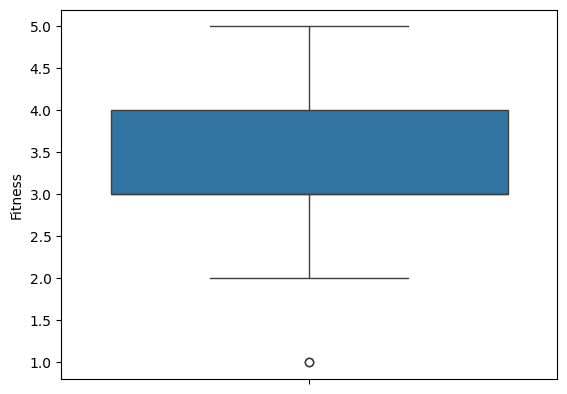

In [ ]:
#usage distribution
sns.boxplot(data['Fitness'])
plt.show()

In [ ]:
#max person self rated on fitness scale
upper_fit = fit_75 + 1.5*fit_iqr
upper_fit

np.float64(5.5)

In [ ]:
#min person self rated on fitness scale
lower_fit = fit_25 - 1.5*fit_iqr
lower_fit

np.float64(1.5)

In [ ]:
#outlier
len(data[data['Fitness'] < lower_use])

2

- there are only 2 people who scaled themselves less than 2 on fitness scale between 1 and 5

In [ ]:
data['Income'].describe()

,Income
count,180.000000
mean,53719.577778
std,16506.684226
min,29562.000000
25%,44058.750000
50%,50596.500000
75%,58668.000000
max,104581.000000


In [ ]:
data['Income'].value_counts().sort_values(ascending=False)[:5]

,count
Income,
45480,14
52302,9
53439,8
54576,8
46617,8


most number of who purchase tredmill having income approx $45480

In [ ]:
#25 percentile
inc_25=np.percentile(data['Income'], 25)
inc_25

np.float64(44058.75)

In [ ]:
#50 percentile
inc_50=np.percentile(data['Income'], 50)
inc_50

np.float64(50596.5)

- 25% of the people who bought tredmill have income less than or equal to approx 44000 income
- 50% of the people who bought tredmill have income less than or equal to approx 55000 income

In [ ]:
#75 percentile
inc_75=np.percentile(data['Income'], 75)
inc_75

np.float64(58668.0)

In [ ]:
#iqr
inc_iqr = inc_75 - inc_25
inc_iqr

np.float64(14609.25)

50% of the people who made purchases have incomes between 44,058 and 59,668.

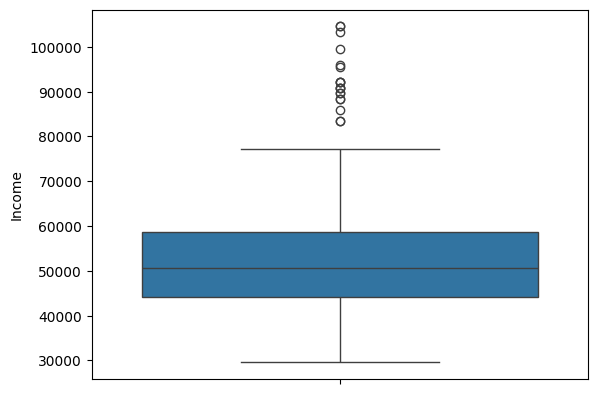

In [ ]:
sns.boxplot(data['Income'])
plt.show()

In [ ]:
#maximum
upper_inc = inc_75 + 1.5*inc_iqr
upper_inc

np.float64(80581.875)

In [ ]:
lower_inc = inc_25 - 1.5*inc_iqr
lower_inc

np.float64(22144.875)

In [ ]:
#outlier
len(data[data['Income'] > upper_inc])

19

In [ ]:
#The average number of miles the customer expects to walk/run each week
data['Miles'].describe()

,Miles
count,180.000000
mean,103.194444
std,51.863605
min,21.000000
25%,66.000000
50%,94.000000
75%,114.750000
max,360.000000


In [ ]:
data['Miles'].value_counts().sort_values(ascending=False)[:5]

,count
Miles,
85,27
95,12
66,10
75,10
47,9


Most people expect to walk or run an average of 85 miles per week.

In [ ]:
len(data[data['Miles'] == 85])/len(data)

0.15

15% of the people expect to run/walk for avergae of 85 miles a week

In [ ]:
#25th percentile
mil_25 = np.percentile(data['Miles'], 25)
mil_25

np.float64(66.0)

In [ ]:
#50th percentile
mil_50 = np.percentile(data['Miles'], 50)
mil_50

np.float64(94.0)

In [ ]:
#75th percentile
mil_75 = np.percentile(data['Miles'], 75)
mil_75

np.float64(114.75)

In [ ]:
#iqr
mil_iqr = mil_75 - mil_25
mil_iqr

np.float64(48.75)

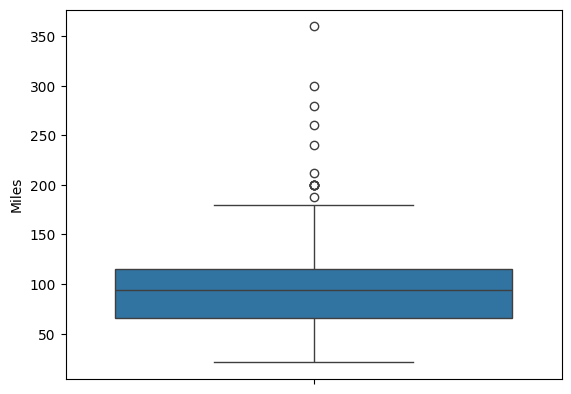

In [ ]:
sns.boxplot(data['Miles'])
plt.show()

In [ ]:
#maximum miles person expect to walk/run in a week
upper_mil = mil_75 + 1.5*mil_iqr
upper_mil

np.float64(187.875)

In [ ]:
#minimum miles person expect to walk/run in a week
lower_mil = mil_25 - 1.5*mil_iqr
lower_mil

np.float64(-7.125)

In [ ]:
pd.crosstab(index = data['Product'], columns =  data['Gender'], margins  = True)

Gender,Female,Male,All
Product,,,
KP281,40,40,80
KP481,29,31,60
KP781,7,33,40
All,76,104,180


In [ ]:
# What is the probability of a male customer buying a KP781 treadmill?
33/180

0.18333333333333332

In [ ]:
# What is the probability of a male customer buying a KP481 treadmill?
31/180

0.17222222222222222

In [ ]:
# What is the probability of a male customer buying a KP281 treadmill?
40/180

0.2222222222222222

- 0.18 of the male customer buying KP781
- 0.17 of the male customer buying KP481
- 0.22 of the male customer buying KP281
- probablity that male buy a KP281 is high

In [ ]:
# What is the probability of a female customer buying a KP781 treadmill?
7/180

0.03888888888888889

In [ ]:
# What is the probability of a female customer buying a KP481 treadmill?
29/180

0.16111111111111112

In [ ]:
# What is the probability of a female customer buying a KP281 treadmill?
40/180

0.2222222222222222

- 0.03 of the female customer buying KP781
- 0.16 of the female customer buying KP481
- 0.22 of the female customer buying KP281
- probablity that female buy a KP281 is high

In [ ]:
pd.crosstab(index = data['Product'], columns = data['MaritalStatus'], margins = True)

MaritalStatus,Partnered,Single,All
Product,,,
KP281,48,32,80
KP481,36,24,60
KP781,23,17,40
All,107,73,180


In [ ]:
# What is the probability of a single buying a KP281 treadmill?
32/180


0.17777777777777778

In [ ]:
# What is the probability of a single buying a KP481 treadmill?
24/180



0.13333333333333333

In [ ]:
# What is the probability of a single buying a K7481 treadmill?
17/180

0.09444444444444444

- 0.17 chances singles buying KP281
- 0.13 chances singles buying KP481
- 0.09 chances singles buying KP781
- probablity that singles buying KP281 is high

In [ ]:
# What is the probability of Partnered a buying a K281 treadmill?
48/140

0.34285714285714286

In [ ]:
# What is the probability of Partnered a buying a K481 treadmill?
36/140

0.2571428571428571

In [ ]:
# What is the probability of Partnered a buying a K281 treadmill?
23/140

0.16428571428571428

- 0.34 chances partnered buying KP281
- 0.25 chances partnered buying KP481
- 0.16 chances partnered buying KP781
- probablity that partnered buying KP281 is high

In [ ]:
data.groupby('Product')['Income'].agg(['min', 'max', 'median', 'std'])

,min,max,median,std
Product,,,,
KP281,29562,68220,46617.0,9075.783190
KP481,31836,67083,49459.5,8653.989388
KP781,48556,104581,76568.5,18505.836720


In [ ]:
data['Product'].value_counts()

,count
Product,
KP281,80
KP481,60
KP781,40


In [ ]:
#percentage of customer purchased KP281
80/len(data) *100

44.44444444444444

In [ ]:
#percentage of customer  purchased KP481
60/len(data)*100

33.33333333333333

In [ ]:
#percentage of customer purchased K781
40/len(data)*100

22.22222222222222

- 44%45 customer purchased KP281

In [ ]:
# Product Vs gender
pd.crosstab(index = data['Gender'], columns = data['Product'], margins = True)

Product,KP281,KP481,KP781,All
Gender,,,,
Female,40,29,7,76
Male,40,31,33,104
All,80,60,40,180


In [ ]:
# prob of customer buying KP281 given that customer is Female
round(40/76, 2)

0.53

In [ ]:
# prob of customer buying KP481 given that customer is Female
round(29/76, 2)

0.38

In [ ]:
# prob of customer buying KP781 given that customer is Female
round(7/76, 2)

0.09

 female customers are most likely to buy KP281, followed by KP481. They are least likely to buy KP781.

In [ ]:
# prob of customer buying KP281 given that customer is Male
round(40/104, 2)

0.38

In [ ]:
# prob of customer buying KP481 given that customer is Male
round(31/104, 2)

0.3

In [ ]:
# prob of customer buying KP781 given that customer is Male
round(33/104, 2)

0.32

 male customers are most likely to buy KP281, followed by KP781. They are least likely to buy KP481.

In [ ]:
#prob of female buying tredmill
round(76/180, 2)

0.42

In [ ]:
#prob of male buying tredmill
round(104/180, 2)

0.58

probablity of pucharsing tredmill is higher in male

In [ ]:
# prob of female buying a product given that product sold was KP281
round(40/80,2)

0.5

In [ ]:
# prob of male buying a product given that product sold was KP281
round(40/80,2)

0.5

probablity of buying KP281 in female is same as male

In [ ]:
# prob of female buying a product given that product sold was KP481
round(29/60,2)

0.48

In [ ]:
# prob of male buying a product given that product sold was KP481
round(31/60,2)

0.52

probablity that male buying KP481 is higher than female

In [ ]:
# prob of female buying a product given that product sold was KP781
round(7/40,2)

0.17

In [ ]:
# prob of male buying a product given that product sold was KP781
round(33/40,2)

0.82

pobablity that male buying KP781 is high

Text(0.5, 1.0, 'Product vs Gender')

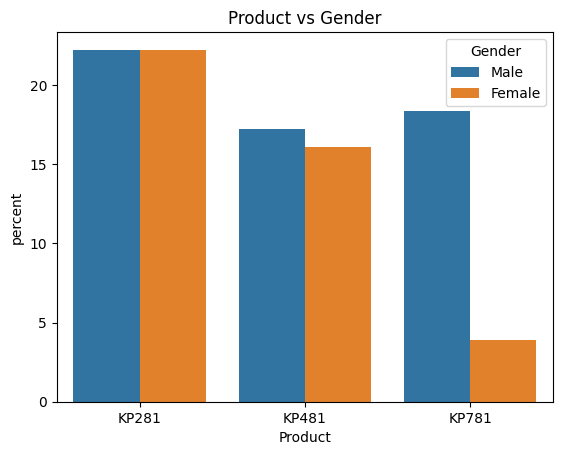

In [ ]:
#visualising
sns.countplot(data = data, x = 'Product', hue = 'Gender', stat ='percent')
plt.title('Product vs Gender')

- Both men and women like KP281 the same.
- More men buy KP481 compared to women.
- A lot more men buy KP781 than women.
- Women like KP281 the most and KP781 the least.
- Men like KP281 the most, then KP781, and KP481 the least.

In [ ]:
# Product vs Martialstatus
pd.crosstab(index = data['Product'],  columns =data['MaritalStatus'], margins=True)

MaritalStatus,Partnered,Single,All
Product,,,
KP281,48,32,80
KP481,36,24,60
KP781,23,17,40
All,107,73,180


In [ ]:
#prob that customer is Single given that he/she is bought KP281
32/80

0.4

In [ ]:
# probablity of single buyer
73/180

0.40555555555555556

KP281 attracts higher porportion of single customer than overall purchases of other products

In [ ]:
##prob that customer is Partnered given that he/she is bought KP281
48/107

0.4485981308411215

In [ ]:
# prob of Partnered buying KP281
107/180

0.5944444444444444

In [ ]:
data

Text(0.5, 1.0, 'Product vs Gender')

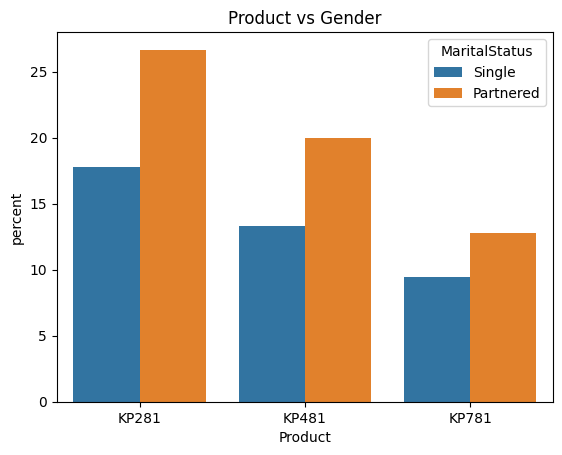

In [ ]:
#visualising
sns.countplot(data = data, x = 'Product', hue = 'MaritalStatus', stat ='percent')
plt.title('Product vs Gender')

Partnered customer dominate the dataset

In [ ]:
#product vs Education
data.groupby('Product')['Education'].describe()

,count,mean,std,min,25%,50%,75%,max
Product,,,,,,,,
KP281,80.0,15.037500,1.216383,12.0,14.0,16.0,16.0,18.0
KP481,60.0,15.116667,1.222552,12.0,14.0,16.0,16.0,18.0
KP781,40.0,17.325000,1.639066,14.0,16.0,18.0,18.0,21.0


In [ ]:
pd.crosstab(index = data['Product'], columns = data['Education'], normalize = True)

Education,12,13,14,15,16,18,20,21
Product,,,,,,,,
KP281,0.011111,0.016667,0.166667,0.022222,0.216667,0.011111,0.000000,0.000000
KP481,0.005556,0.011111,0.127778,0.005556,0.172222,0.011111,0.000000,0.000000
KP781,0.000000,0.000000,0.011111,0.000000,0.083333,0.105556,0.005556,0.016667


- KP281 & KP481 bought by customer with education level ranges from 12-18 years
- KP781 bought by customer with education level ranges from 14-21 years

In [ ]:
#Product vs Age
data.groupby('Product')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Product,,,,,,,,
KP281,80.0,28.55,7.221452,18.0,23.00,26.0,33.00,50.0
KP481,60.0,28.90,6.645248,19.0,24.00,26.0,33.25,48.0
KP781,40.0,29.10,6.971738,22.0,24.75,27.0,30.25,48.0


50% of the customer buying KP281 and KP481 are of age below or equal to 26

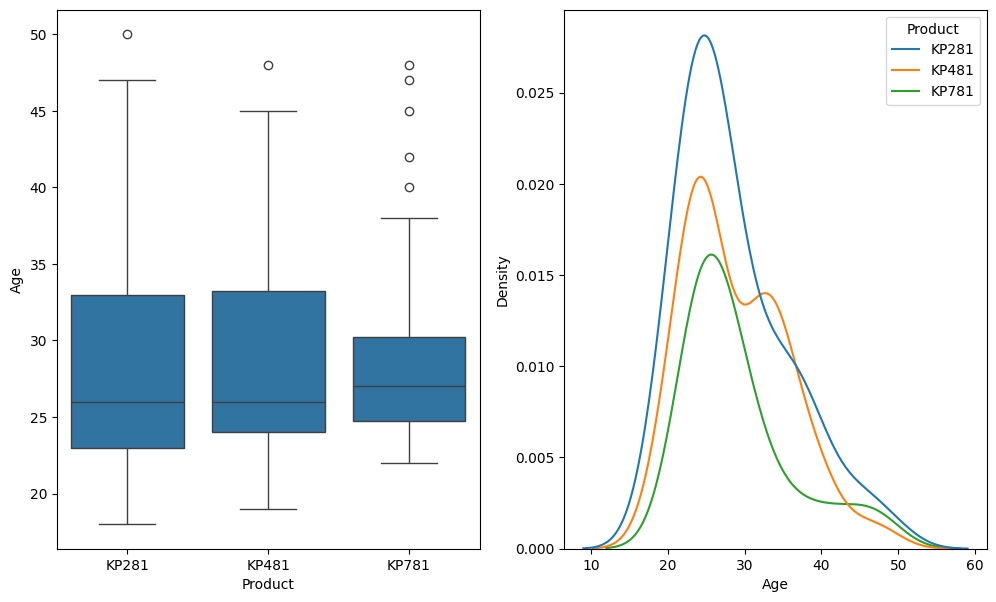

In [ ]:
#visualise
plt.figure(figsize = (12,7))
plt.subplot(1,2,1)
sns.boxplot(data = data, x = 'Product', y = 'Age')

plt.subplot(1,2,2)
sns.kdeplot(data = data, x = 'Age', hue = 'Product')
plt.show()

-50% of young adult customers aged between 24 and 33 prefer the KP281 product.

-The age range for KP781 customers is narrower compared to other products.

-Customers older than 46 are more likely to prefer KP781, showing the highest proportion of older buyers among all products.

In [ ]:
data['AgeGroup'] = pd.cut(data['Age'], bins=[15,25,35,45,55], labels = ['18-25', '25-35', '35-45', '45-55'])
data.head(2)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Grouped_Miles,AgeGroup
0,KP281,18,Male,14,Single,3,4,29562,112,70-120,18-25
1,KP281,19,Male,15,Single,2,3,31836,75,70-120,18-25


In [ ]:
pd.crosstab(index = data['Product'], columns=data['AgeGroup'], margins=True)

AgeGroup,18-25,25-35,35-45,45-55,All
Product,,,,,
KP281,34,32,11,3,80
KP481,28,24,7,1,60
KP781,17,17,4,2,40
All,79,73,22,6,180


In [ ]:
# probality of customer with age group 18-25 buying tredmill
79/180

0.4388888888888889

There is a 0.4% chance that a customer making a purchase is in the age group 18–25, which is the highest among all age groups.

In [ ]:
#product vs usage
pd.crosstab(index=data['Product'], columns = data['Usage'], margins = True)

Usage,2,3,4,5,6,7,All
Product,,,,,,,
KP281,19,37,22,2,0,0,80
KP481,14,31,12,3,0,0,60
KP781,0,1,18,12,7,2,40
All,33,69,52,17,7,2,180


In [ ]:
#prob that customer expect to use 3 times a week given that product is KP281
37/80

0.4625

In [ ]:
#prob of customer expect to use 3 times a week
69/180

0.38333333333333336

<Axes: xlabel='Product', ylabel='count'>

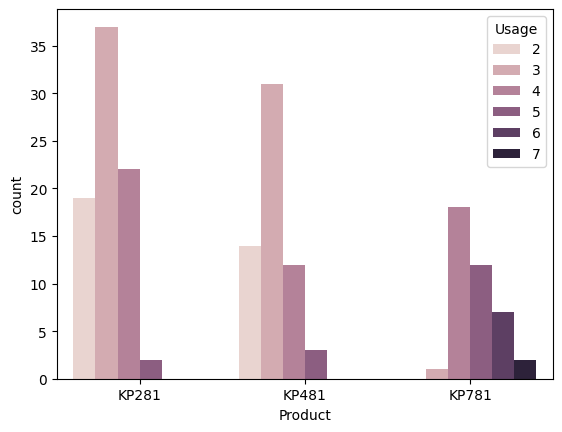

In [ ]:
sns.countplot(data=data, x='Product', hue='Usage')

- Customers who expect to use the product less than 5 times a week on average tend to purchase KP281.
- Customers who expect to use the product more than 4 times a week on average tend to purchase KP781.

In [ ]:
#product vs fitness
pd.crosstab(index = data['Product'], columns = data['Fitness'], margins=True)

Fitness,1,2,3,4,5,All
Product,,,,,,
KP281,1,14,54,9,2,80
KP481,1,12,39,8,0,60
KP781,0,0,4,7,29,40
All,2,26,97,24,31,180


In [ ]:
#probablity of customer with fitness score 3 given that they purchased KP281
54/80

0.675

In [ ]:
# probablity of customer with fitness scale 3 buying tredmill
97/180

0.5388888888888889

Customers with a fitness score of 3 are most likely to buy the KP281 treadmill

In [ ]:
#probablity of customer with fitness score 5 given that they purchased KP781
29/40

0.725

In [ ]:
# probablity of customer with fitness scale 5 buying tredmill
31/180

0.17222222222222222

KP781 stands out as the preferred choice for customers with the highest fitness level (score of 5).

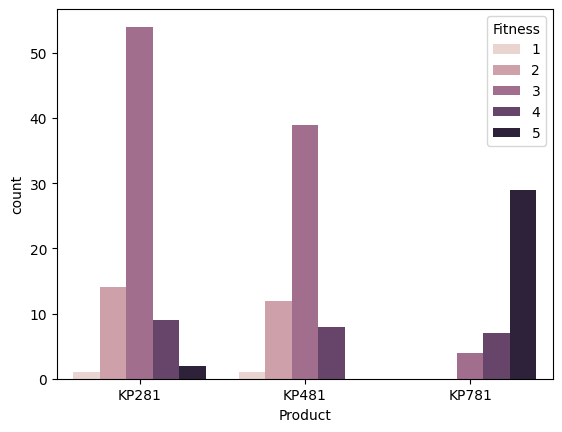

In [ ]:
sns.countplot(data  = data, x = 'Product', hue = 'Fitness')
plt.title('Product vs fitness scale')
plt.show()

In [ ]:
#Product vs Income
#Product vs Age
data.groupby('Product')['Income'].describe()

,count,mean,std,min,25%,50%,75%,max
Product,,,,,,,,
KP281,80.0,46418.025,9075.783190,29562.0,38658.00,46617.0,53439.0,68220.0
KP481,60.0,48973.650,8653.989388,31836.0,44911.50,49459.5,53439.0,67083.0
KP781,40.0,75441.575,18505.836720,48556.0,58204.75,76568.5,90886.0,104581.0


<Axes: xlabel='Income', ylabel='Density'>

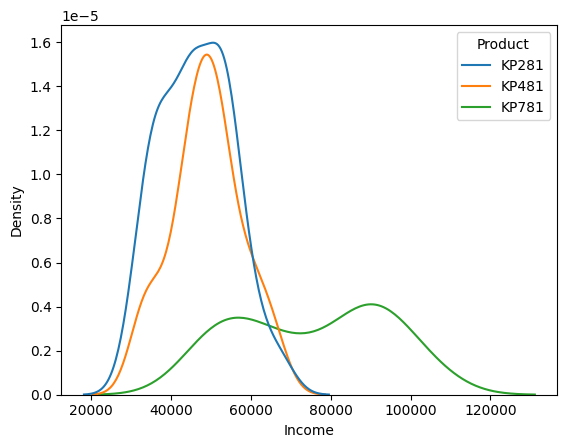

In [ ]:
sns.kdeplot(data = data, x = 'Income' , hue = 'Product')

<Axes: xlabel='Product', ylabel='Income'>

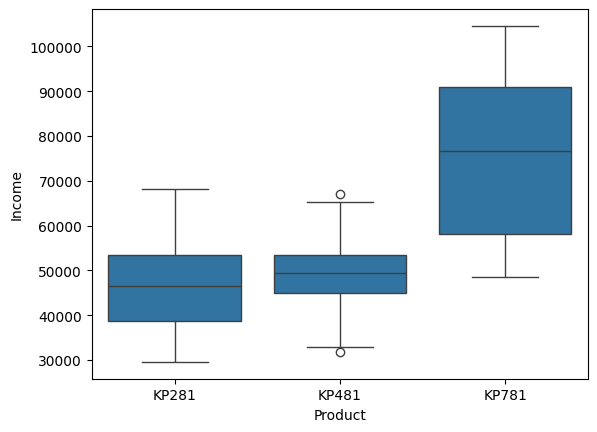

In [ ]:
sns.boxplot(data = data, y = 'Income' , x = 'Product' )

In [ ]:
data_781 = data.loc[data['Product'] == 'KP781']
#range of customer buying KP781
#25 percentile
data_781_25 = np.percentile(data_781['Income'], 25)
data_781_25

np.float64(58204.75)

In [ ]:
data_781_75  = np.percentile(data_781['Income'], 75)
data_781_75

np.float64(90886.0)

In [ ]:
data_781_iqr  = data_781_75 - data_781_25
data_781_iqr

np.float64(32681.25)

50% of the customer buying KP781 have income between \$58204 and \$90886 which maximum in all the product types

In [ ]:
data_281 = data.loc[data['Product'] == 'KP281']
#25 percentile Income of customer buying KP281
data_281_25 = np.percentile(data_281['Income'], 25)
data_281_25

np.float64(38658.0)

In [ ]:
#75 percentile Income of customer buying KP281
data_281_25 = np.percentile(data_281['Income'], 75)
data_281_25

np.float64(53439.0)

50% of the customer buying KP281 have income between \$38658 and \$53439

In [ ]:
data_481 = data.loc[data['Product'] == 'KP481']
#25 percentile Income of customer buying KP281
data_481_25 = np.percentile(data_481['Income'], 25)
data_481_25

np.float64(44911.5)

In [ ]:
#75 percentile Income of customer buying KP281
data_481_75 = np.percentile(data_481['Income'], 75)
data_481_75

np.float64(53439.0)

- 50% of the customer buying KP281 have income between \$44911 and \$5339
- 75% of the customer having salaries below \$53439 prefred to buy KP281 and KP481

In [ ]:
#Product vs miles (● Miles: average number of miles the customer expects to walk/run each week)
data.groupby('Product')['Miles'].describe()

,count,mean,std,min,25%,50%,75%,max
Product,,,,,,,,
KP281,80.0,82.787500,28.874102,38.0,66.0,85.0,94.0,188.0
KP481,60.0,87.933333,33.263135,21.0,64.0,85.0,106.0,212.0
KP781,40.0,166.900000,60.066544,80.0,120.0,160.0,200.0,360.0


In [ ]:
data['Miles'].min(),data['Miles'].max(),

(21, 360)

In [ ]:
data['Grouped_Miles']= pd.cut(data['Miles'], bins = [20,70,120,170,210,260,320,370], labels = ['20-70', '70-120', '120-170', '170-210', '210-260', '260-320', '320-370'])

In [ ]:
pd.crosstab(index = data['Product'], columns = data['Grouped_Miles'], normalize = True, margins = True).round(2)

Grouped_Miles,20-70,70-120,120-170,170-210,210-260,260-320,320-370,All
Product,,,,,,,,
KP281,0.16,0.26,0.03,0.01,0.00,0.00,0.00,0.44
KP481,0.10,0.19,0.04,0.00,0.01,0.00,0.00,0.33
KP781,0.00,0.07,0.06,0.07,0.01,0.01,0.01,0.22
All,0.26,0.51,0.13,0.07,0.02,0.01,0.01,1.00


- 25% of the customer who are buying KP281 expect to walk 70-120 miles a week
- 18% of the customer who are buying KP481 expect to walk 70-120 miles a week
- 7% of the customer who are buying KP781 expect to walk 70-120 or 170-210 miles a week

<Axes: xlabel='Miles', ylabel='Density'>

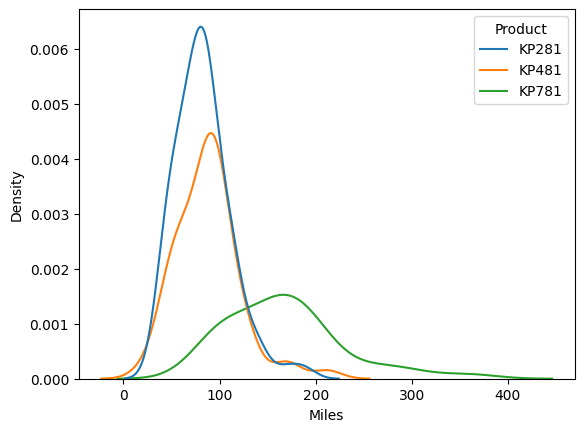

In [ ]:
sns.kdeplot(data = data, x = 'Miles', hue = 'Product')

- customer who expect to run/walk maximum of 360 miles a week have purchased KP781
- customer who expect to run/walk max avg 200  miles a week have purchases KP281 & KP481

<Axes: >

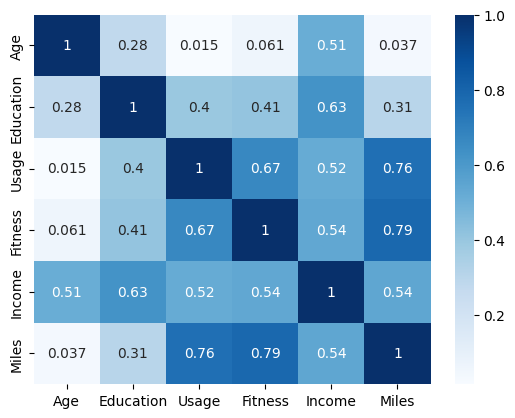

In [ ]:
#Corelation heatmap
data_corr = data.corr(numeric_only = True)
sns.heatmap(data_corr, cmap = 'Blues', annot = True)

- Age show high positive correlation with Income
- Education  show high positive correlation with Income
- Usage show high positive correlation with Fitness as well as Miles
- Miles show high positive correlation with Fitness

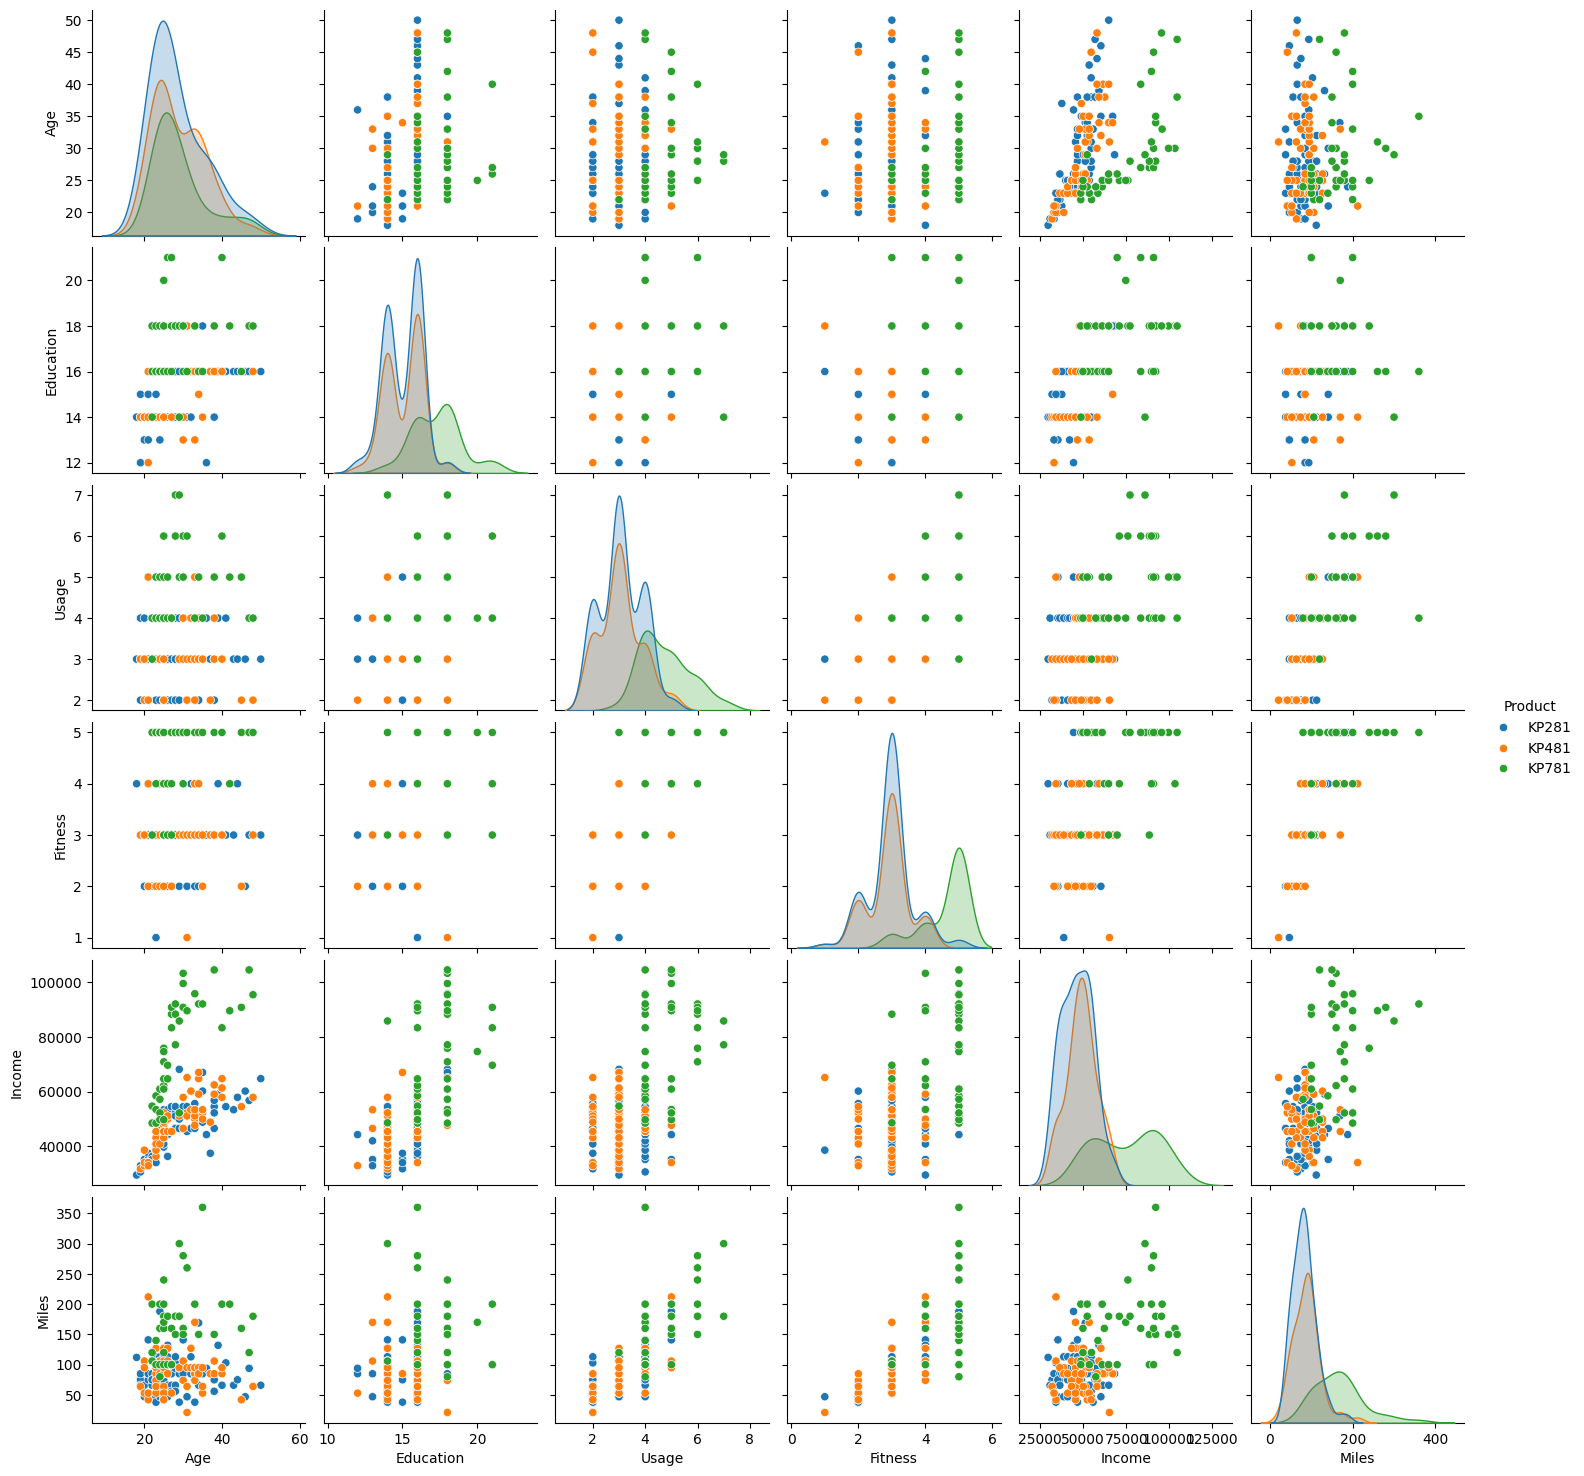

In [ ]:
sns.pairplot(data = data, hue = 'Product')

# Customer Profile


KP281
- Gender: Mostly bought by females.

- Marital Status: Preferred by customers with partners.

- Age: Bought across all age groups.

- Income: Half of the buyers earn between 44,911 and 53,339.

- Education: Buyers have 12–18 years of education.

- Usage: Bought buy customer who expect to use 3 times a week

- Miles: 25% of buyers expect to walk 70–120 miles per week.






KP481
- Gender: Mostly bought by males.

- Marital Status: More preferred by partnered individuals than single ones.

- Age: Buyers are mostly between 19–48 years old.

- Income: 75% of buyers earn less than $53,439.

- Education: Buyers have 12–18 years of education.

- Usage: Bought buy customer who expect to use 3 times a week

- Miles: 18% expect to walk 70–120 miles per week.



KP781

- Gender: Mostly bought by males.

- Marital Status: Preferred by partnered customers.

- Fitness: Preferred by highly fit individuals with higher weekly usage (more than 4 times a week).

- Income: 50% of the buyers earn between 58,204 and  90,886.

- Education: Buyers have 14–21 years of education.

- Usage: Customers expect to walk 70–120 or 170–210 miles per week.



#Recommendations:

KP281 and KP481 can be suggested to Customer with young age groups, education level 12-18 years , also it can be advertised in instagram, tiktok to attract young customer

KP781 can be suggested to the male customers, or to the customers who expect to use tredmill for more than 4 times a week.
   

